In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer.pitch as Pitch
import seaborn as sns

In [203]:
#Want to add the dataframe for Lionel Messi
pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Messi vs Tottenham at Wembley.csv')

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Barcelona,Messi,Dribble,0,55,54,37,49,46
1,Barcelona,Messi,Successful Pass,0,56,48,49,13,73
2,Barcelona,Messi,Successful Pass,1,22,53,23,59,19
3,Barcelona,Messi,Dribble,1,24,46,81,35,65
4,Barcelona,Messi,Foul won,1,27,34,64,-,-
...,...,...,...,...,...,...,...,...,...
76,Barcelona,Messi,Unsuccessful Pass,10,47,45,55,53,60
77,Barcelona,Messi,Dribble,10,53,63,96,75,95
78,Barcelona,Messi,Dispossessed,10,58,79,95,-,-
79,Barcelona,Messi,Tackle,10,59,87,91,-,-


In [204]:
import numpy as np

In [205]:
#Load the CSV into a dataframe
df=pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Messi vs Tottenham at Wembley.csv')

In [206]:
#Want to list the events without end coordinates
events_without_end_coordinates=['Foul won','Tackle','Dispossessed','Tackled']

In [207]:
#Assign NaN values to events that do not have X2 and Y2
df.loc[df['Event'].isin(events_without_end_coordinates), ['X2','Y2']]= np.nan

In [208]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Barcelona,Messi,Dribble,0,55,54,37,49,46
1,Barcelona,Messi,Successful Pass,0,56,48,49,13,73
2,Barcelona,Messi,Successful Pass,1,22,53,23,59,19
3,Barcelona,Messi,Dribble,1,24,46,81,35,65
4,Barcelona,Messi,Foul won,1,27,34,64,-,-
...,...,...,...,...,...,...,...,...,...
76,Barcelona,Messi,Unsuccessful Pass,10,47,45,55,53,60
77,Barcelona,Messi,Dribble,10,53,63,96,75,95
78,Barcelona,Messi,Dispossessed,10,58,79,95,-,-
79,Barcelona,Messi,Tackle,10,59,87,91,NaN,NaN


In [209]:
#Want to list number of events Messi has in the dataset. Helps with legend.
event_counts=df['Event'].value_counts()
print(event_counts)

Successful Pass      40
Dribble              16
Unsuccessful Pass     8
Foul won              3
Dispossessed          3
Tackle                2
Shot on Target        2
Shot off Target       2
Goal                  2
Tackled               2
Free kick             1
Name: Event, dtype: int64


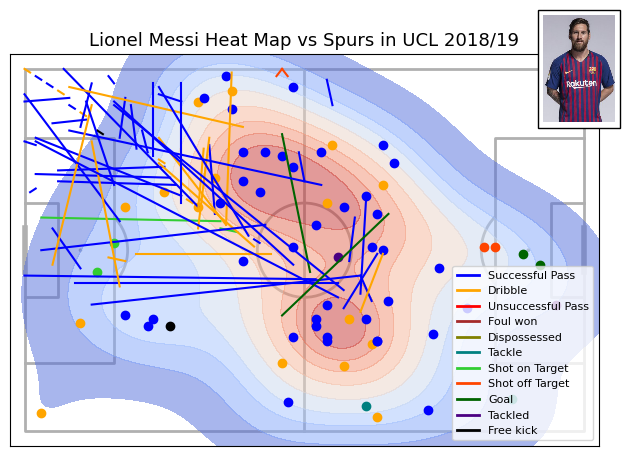

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the pitch
pitch = Pitch(pitch_type='wyscout', axis=True, label=True)
fig, ax = pitch.draw()

# Creating the heatmap using kdeplot
sns.kdeplot(
    x=df['X'],  # Use x= for X coordinates
    y=df['Y'],  # Use y= for Y coordinates
    fill=True,  # Fill the contours for better visualization
    cmap='coolwarm',  # Choose a colormap for the heatmap
    ax=ax,  # Use the same pitch axis
    alpha=0.5  # Transparency
)

# Loop through the dataset and plot events with specific colors
for X in range(len(df['X'])):
    if df['Event'][X] == 'Successful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='blue')
        plt.scatter(df['X'][X], df['Y'][X], color='blue')
    if df['Event'][X] == 'Dribble':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orange')
        plt.scatter(df['X'][X], df['Y'][X], color='orange')
    if df['Event'][X] == 'Unsuccessful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='red')
        plt.scatter(df['X'][X], df['Y'][X], color='red')
    if df['Event'][X] == 'Foul won':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='brown')
        plt.scatter(df['X'][X], df['Y'][X], color='brown')
    if df['Event'][X] == 'Dispossessed':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='olive')
        plt.scatter(df['X'][X], df['Y'][X], color='olive')
    if df['Event'][X] == 'Tackle':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='teal')
        plt.scatter(df['X'][X], df['Y'][X], color='teal')
    if df['Event'][X] == 'Shot on Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='limegreen')
        plt.scatter(df['X'][X], df['Y'][X], color='limegreen')
    if df['Event'][X] == 'Shot off Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orangered')
        plt.scatter(df['X'][X], df['Y'][X], color='orangered')
    if df['Event'][X] == 'Goal':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='darkgreen')
        plt.scatter(df['X'][X], df['Y'][X], color='darkgreen')
    if df['Event'][X] == 'Tackled':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='indigo')
        plt.scatter(df['X'][X], df['Y'][X], color='indigo')
    if df['Event'][X] == 'Free kick':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='black')
        plt.scatter(df['X'][X], df['Y'][X], color='black')

#legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='Successful Pass'),
    Line2D([0], [0], color='orange', lw=2, label='Dribble'),
    Line2D([0], [0], color='red', lw=2, label='Unsuccessful Pass'),
    Line2D([0], [0], color='brown', lw=2, label='Foul won'),
    Line2D([0], [0], color='olive', lw=2, label='Dispossessed'),
    Line2D([0], [0], color='teal', lw=2, label='Tackle'),
    Line2D([0], [0], color='limegreen', lw=2, label='Shot on Target'),
    Line2D([0], [0], color='orangered', lw=2, label='Shot off Target'),
    Line2D([0], [0], color='darkgreen', lw=2, label='Goal'),
    Line2D([0], [0], color='indigo', lw=2, label='Tackled'),
    Line2D([0], [0], color='black', lw=2, label='Free kick'),

]
ax.legend(handles=legend_elements, loc='lower right', fontsize=8)

# Player image (replace with valid path)
player_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi portrait.jpg'
)
imagebox = OffsetImage(player_image, zoom=0.19)
ab = AnnotationBbox(imagebox, (99, 0), frameon=True, xycoords='data')
ax.add_artist(ab)

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title to the heatmap
plt.title('Lionel Messi Heat Map vs Spurs in UCL 2018/19', color='black', size=13)
plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi Heat Map vs Spurs in UCL 2018.png', dpi=300, bbox_inches='tight')
plt.show()